In [6]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
####USER DEFINED VARIABLES####

#read in a csv from cytoflex with all wells exported from cytoflex
#load in replicates and merge
bc_6_rep1 = pd.read_csv('/Users/stephaniecrilly/Library/CloudStorage/Box-Box/kortemmelab/home/scrilly/helix_sliding/20230729_bm01_cterm_alfa_titrations/20230729_bm01_cterm_alfa_titrations_analysis_sample_ids.csv')
bc_6_rep2 = pd.read_csv('/Users/stephaniecrilly/Library/CloudStorage/Box-Box/kortemmelab/home/scrilly/helix_sliding/20230726_ba_1_6_titration/20230726_ba_1_6_analysis_sample_ids.csv')

bc_3_rep1 = pd.read_csv('/Users/stephaniecrilly/Library/CloudStorage/Box-Box/kortemmelab/home/scrilly/helix_sliding/20230729_bm01_cterm_alfa_titrations/20230729_bm01_cterm_alfa_titrations_analysis_sample_ids.csv')
bc_3_rep2 = pd.read_csv('/Users/stephaniecrilly/Library/CloudStorage/Box-Box/kortemmelab/home/scrilly/helix_sliding/20230722_bm01_alfa_ab_2_yeast_titration/20230722_bm01_alfa_3_4_5_analysis_w_sample_ids.csv')

bc_2_rep1 = pd.read_csv('/Users/stephaniecrilly/Library/CloudStorage/Box-Box/kortemmelab/home/scrilly/helix_sliding/20230729_bm01_cterm_alfa_titrations/20230729_bm01_cterm_alfa_titrations_analysis_sample_ids.csv')
bc_2_rep2 = pd.read_csv('/Users/stephaniecrilly/Library/CloudStorage/Box-Box/kortemmelab/home/scrilly/helix_sliding/20230721_bm01_alfa_ab_2_yeast_titration/20230721_bm01_alfa_ab_2_analysis_w_sample_ids.csv')

alfa_ctrl_rep1 = pd.read_csv('/Users/stephaniecrilly/Library/CloudStorage/Box-Box/kortemmelab/home/scrilly/helix_sliding/20230601_on_yeast_kds/20230601_alfa_titration_kds_analysis_sample_ids.csv')
alfa_ctrl_rep2 = pd.read_csv('/Users/stephaniecrilly/Library/CloudStorage/Box-Box/kortemmelab/home/scrilly/helix_sliding/20230607_alfa_yeast_titration/20230607_alfa_titration_analysis_sample_ids.csv')

outdir = ''
file_header = ''

####

In [8]:
####FUNCTIONS####

def sigmoid(b_tot, Kd, p_tot, bg):
    '''
    Equation for a sigmoidal curve
    For curve fit with this function, 
    pass array of y vals as log10 transformed fluorescence
    paass array of x vals as -log10 transformed concentration of binder
    
    Parameters:
    b_tot: -log10 transformed binder concentration values (Molar)
    Kd: dissociation constant
    p_tot: total protein concentration (upper asymptote)
    bg: background signal (lower aymptote)

    '''
    return np.log(p_tot * (10**b_tot/((10**b_tot)+(10**Kd))) + bg) #equivalent to A.M.Phillips sigmoid function

####

In [9]:
#merge dfs
bc_6_merge_df = bc_6_rep1.merge(bc_6_rep2, on='Sample ID:', how='left', suffixes=['_rep1', '_rep2'])
bc_3_merge_df = bc_3_rep1.merge(bc_3_rep2, on='Sample ID:', how='left', suffixes=['_rep1', '_rep2'])
bc_2_merge_df = bc_2_rep1.merge(bc_2_rep2, on='Sample ID:', how='left', suffixes=['_rep1', '_rep2'])
alfa_ctrl_merge_df = alfa_ctrl_rep1.merge(alfa_ctrl_rep2, on='Sample ID:', how='left', suffixes=['_rep1', '_rep2'])
alfa_bm01_exps_merge_df = bc_6_rep1.merge(bc_3_rep2, on='Sample ID:', how='left', suffixes=['_rep1', '_rep2'])
alfa_bm01_exps_merge_df = alfa_bm01_exps_merge_df.merge(bc_2_rep2, on='Sample ID:', how='left')

bc_6_merge_df[['Construct', 'Induction', 'Nb-ALFA [pM]']] = bc_6_merge_df['Sample ID:'].str.split('_', expand=True)
bc_3_merge_df[['Construct', 'Induction', 'Nb-ALFA [pM]']] = bc_3_merge_df['Sample ID:'].str.split('_', expand=True)
bc_2_merge_df[['Construct', 'Induction', 'Nb-ALFA [pM]']] = bc_2_merge_df['Sample ID:'].str.split('_', expand=True)
alfa_ctrl_merge_df[['Construct', 'Induction', 'Nb-ALFA [pM]']] = alfa_ctrl_merge_df['Sample ID:'].str.split('_', expand=True)
alfa_bm01_exps_merge_df[['Construct', 'Induction', 'Nb-ALFA [pM]']] = alfa_bm01_exps_merge_df['Sample ID:'].str.split('_', expand=True)

bc_6_merge_sg_df = bc_6_merge_df.query("Induction == 'SG'", engine='python').copy()
bc_3_merge_sg_df = bc_3_merge_df.query("Induction == 'SG'", engine='python').copy()
bc_2_merge_sg_df = bc_2_merge_df.query("Induction == 'SG'", engine='python').copy()
alfa_ctrl_sg_merge_df = alfa_ctrl_merge_df.query("Induction == 'SG'", engine='python').copy()
alfa_bm01_exps_sg_merge_df = alfa_bm01_exps_merge_df.query("Induction == 'SG'", engine='python').copy()

alfa_bm01_exps_df = alfa_bm01_exps_sg_merge_df.query("Construct == 'ALFA'", engine='python').copy()
bm01_alfa_sg_df = bc_6_merge_sg_df.query("Construct == 'ALFA-bm01-alfa'", engine='python').copy()
thread_6_sg_df = bc_6_merge_sg_df.query("Construct == 'ALFA-bm01-6'", engine='python').copy()
thread_3_sg_df = bc_3_merge_sg_df.query("Construct == 'ALFA-bm01-3'", engine='python').copy()
thread_2_sg_df = bc_2_merge_sg_df.query("Construct == 'ALFA-bm01-2'", engine='python').copy()
alfa_ctrl_3_df = alfa_ctrl_sg_merge_df.query("Construct == 'ALFA-3'", engine='python').copy()
alfa_ctrl_7_df = alfa_ctrl_sg_merge_df.query("Construct == 'ALFA-7'", engine='python').copy()
alfa_ctrl_ala_df = alfa_ctrl_sg_merge_df.query("Construct == 'poly-Ala'", engine='python').copy()
alfa_ctrl_sg_df = alfa_ctrl_sg_merge_df.query("Construct == 'ALFA'", engine='python').copy()

[ 7.          8.          9.          9.50031292 10.         10.50031292
 11.         11.50031292 12.         12.50031292  7.          8.
  9.          9.50031292 10.         10.50031292 11.         11.50031292
 12.         12.50031292  7.          8.          9.          9.50031292
 10.         10.50031292 11.         11.50031292 12.         12.50031292]
[5.01768054 4.95062672 4.86839519 4.85196244 4.74542068 4.51735559
 4.20897315 3.77737607 3.33203428 3.05530186 4.86788626 4.8256364
 4.75086849 4.7059321  4.57551344 4.34082074 3.91875356 3.49227136
 3.09008162 2.82510141 4.88610307 4.86138743 4.80363394 4.79188425
 4.67513283 4.497343   4.16674085 3.75155622 3.32652019 2.93916968]
[-10.83177837 108.64863464  17.70328715]


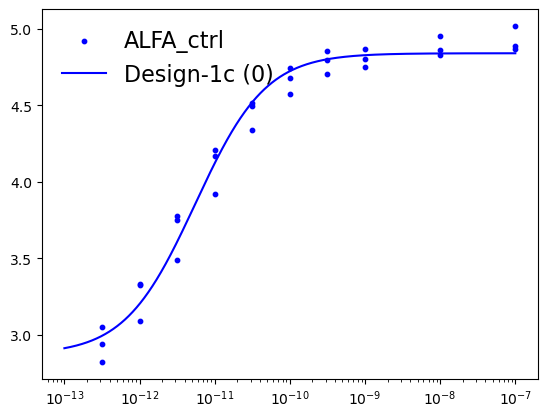

In [29]:
plotted_curve_range = np.linspace(-13, -7, 100000)
plot_colors=['blue', 'cyan', 'green', 'red', 'orange']
legend_labels = ['ALFA_ctrl', 'Design-1c (0)', 'Design-6 (3)', 'Design-3 (7)', 'Design-2 (10)']

#ALFA_ctrl
x_data = np.concatenate((alfa_bm01_exps_df['Nb-ALFA [pM]'], alfa_bm01_exps_df['Nb-ALFA [pM]'], alfa_bm01_exps_df['Nb-ALFA [pM]']))
x_data = -np.log10(x_data.astype(float)*1e-12)

y_data = np.concatenate((alfa_bm01_exps_df['GFP-positive Median APC-A_rep1'], alfa_bm01_exps_df['GFP-positive Median APC-A_rep2'], alfa_bm01_exps_df['GFP-positive Median APC-A']))
y_data = np.log10(y_data)

print(x_data)
print(y_data)

popt, pcov = curve_fit(sigmoid, -x_data,
                                          y_data,
                                          p0=[(-10), 10**(5), 10**(3)],
                                          bounds=[(-12,
                                                   100,
                                                   1),
                                                  (-7,
                                                   1000000,
                                                   100000)],
                                          maxfev=400000)

print(popt)    

plt.scatter((10**-x_data), y_data, marker='o', s=10, c='blue', label='')
plt.plot((10**plotted_curve_range), sigmoid(plotted_curve_range, *popt), ls='-', label='ALFA', color='blue')
plt.xscale('log')
plt.legend(labels=legend_labels, loc='upper left', fontsize=16, frameon=False)  

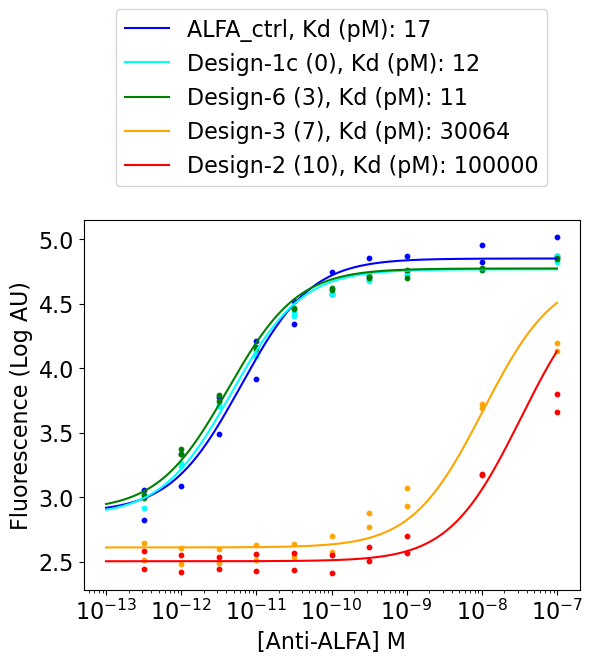

<Figure size 640x480 with 0 Axes>

In [28]:
plotted_curve_range = np.linspace(-13, -7, 100000)
plot_colors=['blue', 'cyan', 'green', 'orange', 'red']
legend_labels = ['ALFA_ctrl', 'Design-1c (0)', 'Design-6 (3)', 'Design-3 (7)', 'Design-2 (10)']
dfs_to_plot = [alfa_bm01_exps_df, bm01_alfa_sg_df, thread_6_sg_df, thread_3_sg_df, thread_2_sg_df]
#alfa ctrl have three replicates but omitting one for now for ease of plotting because other conditions only have 2
        #--see above, all three replicates are plotted and similar

for i,j in enumerate(dfs_to_plot):
    x_vals = np.concatenate((j['Nb-ALFA [pM]'], j['Nb-ALFA [pM]']))
    x_vals = -np.log10(x_vals.astype(float)*1e-12)

    y_vals = np.concatenate((j['GFP-positive Median APC-A_rep1'], j['GFP-positive Median APC-A_rep2']))
    y_vals = np.log10(y_vals)

    popt, pcov = curve_fit(sigmoid, -x_vals,
                                    y_vals,
                                    p0=[(-10), 10**(5), 10**(3)],
                                    bounds=[(-12,
                                                100,
                                                1),
                                            (-7,
                                                1000000,
                                                100000)],
                                    maxfev=400000)

    plt.scatter((10**-x_vals), y_vals, marker='o', s=10, c=plot_colors[i], label='')
    plt.plot((10**plotted_curve_range), sigmoid(plotted_curve_range, *popt), ls='-', label=f'{legend_labels[i]}, Kd (pM): {round(10**(popt[0])*1e12)}', color=plot_colors[i])

plt.xscale('log')
plt.xlabel('[Anti-ALFA] M', fontsize=16)
plt.ylabel('Fluorescence (Log AU)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=[0.5,1.6], fontsize=16)

plt.show()
#plt.savefig(f'{outdir}/tite-seq_fits/{exp_id}_all_controls_pred_fluor.png', dpi=300, bbox_inches = 'tight')
plt.clf()